In [13]:
from keras.datasets import boston_housing
"회귀 문제 , Regression"
(train_data, train_targets),(test_data, test_targets) = boston_housing.load_data()

In [14]:
mean = train_data.mean(axis = 0)
train_data -= mean

std = train_data.std(axis = 0)
train_data /= std

test_data -= mean
test_data /= std

In [32]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)))
    "train_data.shape = (404,13) 여기서 train_data.shape[0] = (404,) , train_data.shape[1] = (13,) 이다."
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(1))
    
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
    return model


In [33]:
import numpy as np

k = 4

num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

"train_data를 4등분해서 3개를 훈련용으로 사용하고 나머지 1개를 검증용으로 사용한다."
"각 범위의 데이터가 모두 검증용으로 한번씩은 사용되어야 한다."
"4등분된 데이터에서 각 범위의 데이터를 검증용으로 사용하였기 때문에 4개의 검증 점수?데이터?가 나온다."

for i in range(k) :
    print("처리중인 폴드 : #",i)
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
    
    "각 범위의 데이터를 합쳐서(np.concatenate = 배열을 합쳐줌) 훈련데이터를 다시 만듬"
    partial_train_data = np.concatenate(
    [train_data[ : i * num_val_samples],
    train_data[(i+1) * num_val_samples : ]],
    axis=0)
    
    "각 범위의 데이터가 합쳐졌기 때문에 그에 맞춰서 라벨도 다시 만듬"
    partial_train_targets = np.concatenate(
    [train_targets[ : i * num_val_samples],
    train_targets[(i+1) * num_val_samples : ]],
    axis = 0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1, verbose = 0)
    val_mse,val_mae = model.evaluate(val_data, val_targets, verbose = 0)
    "verbose = 0 >> 훈련 과정을 출력하지 않게하는 매개변수."
    all_scores.append(val_mae)
    
">>>>이것이 K - 겹 교차검증이다."

처리중인 폴드 : # 0
Epoch 1/100
303/303 [==============================] - 0s 1ms/step - loss: 172.4282 - mae: 9.8347
Epoch 2/100
303/303 [==============================] - 0s 596us/step - loss: 27.5763 - mae: 3.5820
Epoch 3/100
303/303 [==============================] - 0s 609us/step - loss: 20.7043 - mae: 3.1058
Epoch 4/100
303/303 [==============================] - 0s 639us/step - loss: 17.7293 - mae: 2.8141
Epoch 5/100
303/303 [==============================] - 0s 629us/step - loss: 16.0348 - mae: 2.6594
Epoch 6/100
303/303 [==============================] - 0s 625us/step - loss: 14.4120 - mae: 2.5342
Epoch 7/100
303/303 [==============================] - 0s 737us/step - loss: 14.2473 - mae: 2.4899
Epoch 8/100
303/303 [==============================] - 0s 612us/step - loss: 12.8291 - mae: 2.4537
Epoch 9/100
303/303 [==============================] - 0s 589us/step - loss: 12.9870 - mae: 2.4176
Epoch 10/100
303/303 [==============================] - 0s 629us/step - loss: 11.9615 - mae: 2.2

303/303 [==============================] - 0s 625us/step - loss: 4.8910 - mae: 1.4885
Epoch 84/100
303/303 [==============================] - 0s 573us/step - loss: 5.1375 - mae: 1.4538
Epoch 85/100
303/303 [==============================] - 0s 550us/step - loss: 4.6692 - mae: 1.4773
Epoch 86/100
303/303 [==============================] - 0s 616us/step - loss: 4.6772 - mae: 1.4512
Epoch 87/100
303/303 [==============================] - 0s 629us/step - loss: 4.7201 - mae: 1.4771
Epoch 88/100
303/303 [==============================] - 0s 602us/step - loss: 4.3839 - mae: 1.4000
Epoch 89/100
303/303 [==============================] - 0s 606us/step - loss: 4.9580 - mae: 1.4790
Epoch 90/100
303/303 [==============================] - 0s 596us/step - loss: 4.3969 - mae: 1.4471
Epoch 91/100
303/303 [==============================] - 0s 625us/step - loss: 5.0670 - mae: 1.4218
Epoch 92/100
303/303 [==============================] - 0s 596us/step - loss: 4.6173 - mae: 1.3520
Epoch 93/100
303/303 [=

303/303 [==============================] - 0s 652us/step - loss: 5.2287 - mae: 1.5313
Epoch 66/100
303/303 [==============================] - 0s 560us/step - loss: 5.4991 - mae: 1.4819
Epoch 67/100
303/303 [==============================] - 0s 596us/step - loss: 5.0240 - mae: 1.4841
Epoch 68/100
303/303 [==============================] - 0s 619us/step - loss: 4.8470 - mae: 1.5056
Epoch 69/100
303/303 [==============================] - 0s 606us/step - loss: 5.3100 - mae: 1.5235
Epoch 70/100
303/303 [==============================] - 0s 596us/step - loss: 4.5943 - mae: 1.4023
Epoch 71/100
303/303 [==============================] - 0s 662us/step - loss: 5.3839 - mae: 1.4802
Epoch 72/100
303/303 [==============================] - 0s 573us/step - loss: 4.9080 - mae: 1.4225
Epoch 73/100
303/303 [==============================] - 0s 596us/step - loss: 4.9606 - mae: 1.4648
Epoch 74/100
303/303 [==============================] - 0s 599us/step - loss: 4.9597 - mae: 1.4396
Epoch 75/100
303/303 [=

303/303 [==============================] - 0s 574us/step - loss: 4.8574 - mae: 1.5688
Epoch 48/100
303/303 [==============================] - 0s 589us/step - loss: 4.7201 - mae: 1.5087
Epoch 49/100
303/303 [==============================] - 0s 648us/step - loss: 5.0815 - mae: 1.5228
Epoch 50/100
303/303 [==============================] - 0s 609us/step - loss: 4.8344 - mae: 1.4723
Epoch 51/100
303/303 [==============================] - 0s 668us/step - loss: 5.0387 - mae: 1.5125
Epoch 52/100
303/303 [==============================] - 0s 668us/step - loss: 4.7015 - mae: 1.4497
Epoch 53/100
303/303 [==============================] - 0s 625us/step - loss: 4.7765 - mae: 1.5026
Epoch 54/100
303/303 [==============================] - 0s 718us/step - loss: 4.7472 - mae: 1.4678
Epoch 55/100
303/303 [==============================] - 0s 645us/step - loss: 4.6336 - mae: 1.4788
Epoch 56/100
303/303 [==============================] - 0s 625us/step - loss: 4.6175 - mae: 1.5131
Epoch 57/100
303/303 [=

303/303 [==============================] - 0s 658us/step - loss: 7.1425 - mae: 1.8275
Epoch 30/100
303/303 [==============================] - 0s 645us/step - loss: 7.3631 - mae: 1.7709
Epoch 31/100
303/303 [==============================] - 0s 573us/step - loss: 7.0983 - mae: 1.7369
Epoch 32/100
303/303 [==============================] - 0s 569us/step - loss: 6.7005 - mae: 1.7382
Epoch 33/100
303/303 [==============================] - 0s 583us/step - loss: 6.6242 - mae: 1.7400
Epoch 34/100
303/303 [==============================] - 0s 606us/step - loss: 6.6672 - mae: 1.7569
Epoch 35/100
303/303 [==============================] - 0s 635us/step - loss: 6.4771 - mae: 1.7111
Epoch 36/100
303/303 [==============================] - 0s 592us/step - loss: 6.9825 - mae: 1.7256
Epoch 37/100
303/303 [==============================] - 0s 592us/step - loss: 6.8233 - mae: 1.6578
Epoch 38/100
303/303 [==============================] - 0s 586us/step - loss: 6.6939 - mae: 1.7607
Epoch 39/100
303/303 [=

In [36]:
print(all_scores)
print(np.mean(all_scores))
"각각의 검증 점수보다 평균낸 검증 점수가 좀 더 신뢰성이 있다."

[1.8417636156082153, 2.6060314178466797, 2.7128093242645264, 2.2812910079956055]
2.3604738414287567


In [39]:
import numpy as np


num_epochs = 500
all_mae_histories = []

"train_data를 4등분해서 3개를 훈련용으로 사용하고 나머지 1개를 검증용으로 사용한다."
"각 범위의 데이터가 모두 검증용으로 한번씩은 사용되어야 한다."
"4등분된 데이터에서 각 범위의 데이터를 검증용으로 사용하였기 때문에 4개의 검증 점수?데이터?가 나온다."

for i in range(k) :
    print("처리중인 폴드 : #",i)
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
    
    "각 범위의 데이터를 합쳐서(np.concatenate = 배열을 합쳐줌) 훈련데이터를 다시 만듬"
    partial_train_data = np.concatenate(
    [train_data[ : i * num_val_samples],
    train_data[(i+1) * num_val_samples : ]],
    axis=0)
    
    "각 범위의 데이터가 합쳐졌기 때문에 그에 맞춰서 라벨도 다시 만듬"
    partial_train_targets = np.concatenate(
    [train_targets[ : i * num_val_samples],
    train_targets[(i+1) * num_val_samples : ]],
    axis = 0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data = (val_data, val_targets),
                        epochs = num_epochs, batch_size = 1, verbose = 0)
    "epochs가 500이고 이걸 4번 반복하기 때문에 4번 반복된 값의 MAE 값을 구하는 것. 따라서 mae_history의 길이는 500이다."
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    
">>>>이것이 K - 겹 교차검증이다."

처리중인 폴드 : # 0
처리중인 폴드 : # 1
처리중인 폴드 : # 2
처리중인 폴드 : # 3


'>>>>이것이 K - 겹 교차검증이다.'

In [43]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
"모든 폴드에 대해 에포크의 MAE 점수 평균을 계산한다."

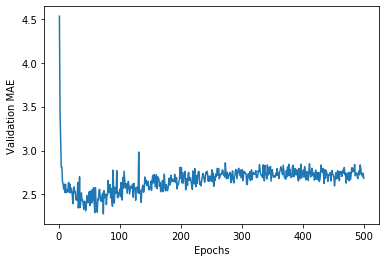

In [44]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

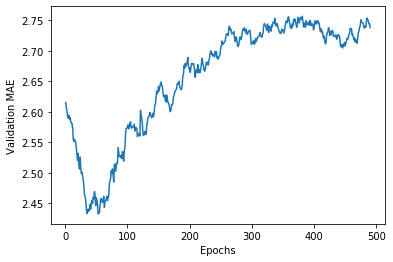

In [65]:
"맨앞 10개의 데이터를 제외시켜서 부드러운 곡선을 만듬. 각 포인트를 이전 포인트의 지수 이동 평균으로 대체함"
def smooth_curve (points, factor = 0.9) :
    smoothed_points = []
    for point in points :
        "if 배열 이름 : =>> 배열이 비지 않았으면 true 비었으면 false"
        if smoothed_points :
            "배열[-1]은 배열의 마지막 요소값"
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else :
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1,len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [68]:
model = build_model()
"위 그래프를 보면 epoch가 80쯤부터 Overfitting이 시작되므로 epochs는 80만 한다."
"검증데이터를 따로 빼지않고 모든 데이터로 훈련시킨다."
model.fit(train_data, train_targets, epochs = 80, batch_size = 16)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Epoch 1/80
404/404 [==============================] - 0s 437us/step - loss: 489.8171 - mae: 20.0986
Epoch 2/80
404/404 [==============================] - 0s 111us/step - loss: 313.1386 - mae: 15.2885
Epoch 3/80
404/404 [==============================] - 0s 118us/step - loss: 151.1043 - mae: 9.8435
Epoch 4/80
404/404 [==============================] - 0s 121us/step - loss: 71.0201 - mae: 6.3282
Epoch 5/80
404/404 [==============================] - 0s 118us/step - loss: 42.5771 - mae: 4.6344
Epoch 6/80
404/404 [==============================] - 0s 116us/step - loss: 30.6710 - mae: 3.8769
Epoch 7/80
404/404 [==============================] - 0s 125us/step - loss: 24.1060 - mae: 3.3688
Epoch 8/80
404/404 [==============================] - 0s 123us/step - loss: 20.9093 - mae: 3.1089
Epoch 9/80
404/404 [==============================] - 0s 130us/step - loss: 18.3707 - mae: 2.9503
Epoch 10/80
404/404 [==============================] - 0s 153us/step - loss: 16.5381 - mae: 2.8120
Epoch 11/80
40

In [70]:
print(test_mae_score)
print(test_mse_score)

2.6674644947052
17.941232868269378
